In [1]:
pip install konlpy

     |████████████████████████████████| 19.4MB 57.1MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 460kB 41.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [2]:
import pandas as pd
from tqdm.notebook import tqdm

from nltk import word_tokenize, pos_tag, ne_chunk
from konlpy.tag import Kkma

from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
path = "/content/drive/MyDrive/Colab/Prob_and_Stats/Data/"

In [4]:
df_raw = pd.read_excel(path + "lyrics_2000_2018.xlsx")

In [5]:
kkma = Kkma()

In [6]:
#시작, 끝 연도 설정
start_year = 2000
end_year = 2018

In [7]:
df_raw.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,아시나요 얼마나 사랑했는지\n그댈 보면 자꾸 눈물이 나서\n\n차마 그대 바라 보지...,처음이라 그래 며칠뒤엔 \n괜찮아져 \n그 생각만으로 벌써 일년이 \n너와 만든 기...,손 닿을 수 없는 저기 어딘가 \n오늘도 넌 숨쉬고 있지만 \n너와 머물던 작은 의...,Just One 10 MINUTES \n내 것이 되는 시간 \n순진한 내숭에 속아...,하루만 니방의 침대가 되고 싶어\n더 따스히 포근히 \n내 품에 감싸 안고 재우고 ...,너무나 사랑한게 죄였나봐 \n떠날까봐 널 가뒀으니\n내게만 보여줬던 니 모습은 \n...,그럴려고 그랬어 돌아가려고 \n너의 차가움엔 그래다 이유 있었던거야\n나를 만지는 ...,너도 날 좋아할 줄은 몰랐어 \n어쩌면 좋아 너무나 좋아 \n꿈만 같아서 나 내자신...,JYP And Wonder Girls\nwe're back\n\n왜 자꾸 쳐다보니 ...,Listen Boy! \nMy First Love Story \n(U-Uh-Huh ...,어쩜 이렇게 하늘은 더 파란 건지\n오늘따라 왜 바람은 또 완벽한지\n그냥 모르는 ...,어디까지 왔나 또 어디 숨었나 \n맘에 들어 왔나 나나나나나 I like you \...,오빤 강남스타일\n강남스타일\n\n낮에는 따사로운 인간적인 여자\n커피 한잔의 여유...,그대가 돌아서면 \n두 눈이 마주칠까\n심장이 Bounce Bounce 두근대 \n...,가끔씩\n나도 모르게\n짜증이나\n너를 향한 맘은\n변하지 않았는데\n혹시 내가\n...,난 깨어나 까만 밤과 함께\n다 들어와 담엔 누구 차례\n한 치 앞도 볼 수 없는 ...,매일 울리는 벨벨벨\n이젠 나를 배려 해줘\n배터리 낭비하긴 싫어\n자꾸만 봐 자꾸...,널 품기 전 알지 못했다\n내 머문 세상\n이토록 찬란한 것을\n\n작은 숨결로 닿...,사랑을 했다 우리가 만나\n지우지 못할 추억이 됐다\n볼만한 멜로드라마 \n괜찮은 ...
1,1,미안해\n\n난 니가 싫어 졌어 우리 이만 헤어져 \n다른 여자가 생겼어 너보다 훨...,I love you 사랑한다는 이말밖에는 \n해줄 말이 없네요I love you \...,1.비린내나는 부둣가를 내 세상처럼 누벼가며\n두 주먹으로 또 하루를 겁없이 살아간...,좋았나봐 널 많이 아꼈나봐\n다시 못견디게 아픈걸 보니\n가슴에서 자꾸만 열이 나고...,이제 모두 세월 따라 흔적도 없이 변해갔지만 \n덕수궁 돌담 길에 아직 남아있어요 ...,미안합니다 고작 나란 사람이 \n당신을 미친 듯 사랑합니다 \n기다립니다 잘난 것\...,그래 나란 사람 버리고 떠나도 널 미워하지 않아\n그만 끝내자고 지겨워 졌다고 말해...,"[지용]ye, Love is pain ..(dedicated)\nTo all my ...",떠나가 \n\nye \nthe finally I reallize \nthat I’m...,이러다 미쳐\n내가 여리여리 착하던 그런 내가\n너 때문에 돌아\n내가 독한 나로 ...,너는 나의 사랑 너는 나의 행복 소중한 사람\n비가 내리면 함께 맞아줄 둘도 없는 ...,아메리카노 좋아 좋아 좋아\n아메리카노 진해 진해 진해\n어떻게 하노 시럽 시럽 시...,"The twinkle, twinkle The twinkle, twinkle\n\n숨...",다같이 원 빠빠빠빠 빠빠빠빠 \n \n날따라 투 빠빠빠빠 빠빠빠빠 \n소리쳐 호 (...,미안해 미안해 하지마\n내가 초라해지잖아\n빨간 예쁜 입술로\n어서 나를 죽이고 가...,궁금해서 잠이 안 와\n그때 왜 그랬어?\n구차해도 묻고 싶어\n그때 난 뭐였어?\...,다가서지 못하고 \n헤매이고 있어\n좋아하지만 \n다른 곳을 보고 있어\n가까워 지...,"이 밤, 그날의 반딧불을 \n당신의 창 가까이 보낼게요\n음 사랑한다는 말, 이에요...",네가 없이 웃을 수 있을까\n생각만 해도 눈물이나\n힘든 시간 날 지켜준 사람\n이...
2,2,세상 무서운걸 아무것도\n모른다고 말하겠죠 \n즐거움만 찾는다고\n\n가상 현실 속...,당신은 모르실 거야\n얼마나 사랑했는지\n세월이 흘러가면은\n그때서 뉘우칠 거야\n...,영완 rap) \nlong gone every time \nI close my ey...,아무리 기다려도 난 못가 \n바보처럼 울고 있는 너의 곁에\n상처만 주는 나를 왜 ...,나를 동생으로만\n그냥 그정도로만 \n귀엽다고 하지만\n누난 내게 여자야 \n니가 ...,이별은 만남보다 참 쉬운건가봐 \n차갑기만 한 사람\n내 맘 다 가져간걸 왜 알지못...,잘지내보여요 그대 얼굴은\n날 잊고 잘사는 듯 하죠\n그런 그대가 얼마나 미운지\n...,내 손만 잡으려 말고 날 안아봐\n두 눈 다 꼭 감은채로 느낌을 봐\n가슴이 참 복...,그대 내게 다가오는 그 모습 \n자꾸 다시 볼 수 없을 것만 같아서 \n감은 두 눈...,Bo Peep Bo Peep Bo Peep Bo Peep\nBo Peep Bo Pe...,T.R.Y. Do it now!\nCan you follow me? Yes!! Uh...,Be on Top Be on Top Be on Top\nGotta go\nDon't...,어디선가 네 목소리가 들려와\n또 바보처럼 네 모습 그려봐(난 또)\n설명할 수 없...,"yo, okay \n나 혹시 몰라 경고하는데 지금 위험해\n자꾸 나를 자극하지마 나...",하얗게 피어난 얼음 꽃 하나가\n달가운 바람에 얼굴을 내밀어\n아무 말 못했던 이름...,꼭 그렇지 않아도 \n충분히 널 이해할 수 있어\n다른 사람 곁에 서 있는 니 모습...,내 피 땀 눈물 내 마지막 춤을\n다 가져가 가\n내 피 땀 눈물 내 차가운 숨을\...,"안녕, 오늘도\n같은 자리 버스 창가에\n기대 앉은 네게 인사를 해, Hi\n역시 ...",설레어 너와 나의 랑데뷰\n(랑데뷰) \n내 마음을 들었다 놨다 해\n맘대루 (맘대...
3,3,벌써 며칠째야 애만 태우는게\n날 사랑한단 한 마디 말조차 하지 못한 채\n용기가 ...,그대는 나만의 여인이여 \n보고 또 보고 싶은 나만의 사랑 \n그대는 나만의 등불이...,어둠 속에 니 얼굴 보다가 \n나도 몰래 눈물이 흘렀어 \n소리 없이 날 따라오며 ...,"참많이 미웠어. 너의 모든게, \n오래된 사진속에 날 보며 웃고 선 고운 너 표정들...",가슴 아파서 목이 메어서 안간힘을 써봐도 \n피해 갈 수도 물러지지도 않는 이별 인...,마음을 틀어막아도 눈물이 샌다\n그 눈물만큼씩 그 사람 내 가슴에 찬다\n어제까지 ...,나의 그대가 원한다면 어디든 무대야\n유머러스한 남자가 요즘엔 추세야\n남자다운 남...,[태연] 전해 주고 싶어 슬픈 시간이\n다 흩어진 후에야 들리지만\n\n[서현] 눈...,You Know I still Love You Baby\nAnd it will ne...,hey playboy\nit's about time and\nyour time's ...,떠나간 사람 내겐 한 사람 Love is go on 너무 아파\n\n너에게 사랑이란...,슈비두바 빠빠빠 슈비두바 빠빠빠 랄랄랄라라 라라리라 \n장미꽃 한송이 받고 너에게 ...,그날 밤은 내가 너무 심했어 \n니가 진짜로 떠나갈 줄은 몰랐어\n“내가 미안해” ...,Ah~!\n알랑가몰라 왜 화끈해야 하는건지\n알랑가몰라 왜 말끔해야 하는건지\n알랑...,Hey HeyHey AOA\nHey HeyHey\nBrave Sound (Drop ...,안녕\n\n쉽지 않죠 바쁘죠\n왜 이렇게 까지 \n해야 하나 싶죠\n바라는 게 \n...,[JENNIE]\n우리 엄만 매일 내게 말했어\n언제나 남자 조심하라고\n사랑은 마...,이제 괜찮니 너무 힘들었잖아\n우리 그 마무리가\n고작 이별뿐인 건데 \n우린 참 ...,[JENNIE]\n착한 얼굴에 그렇지 못한 태도\n가녀린 몸매 속 가려진 \nvol...
4,4,그대여 뭘 망설이나요\n그대 원하고 있죠 눈 앞에 있는 날 \n알아요 그대 뭘 원하...,니가 오기전까진 \n우

In [8]:
#모든 노래의 가사를을 각 단어로 쪼개서 한 곳에 담는다
all_nouns = []

for col_num in tqdm(list(i for i in range(start_year, end_year+1))):
  for row in tqdm(range(100)):#각 연도마다 Top 100
    if type(df_raw[str(col_num)][row]) == str: #비어있을 경우 nan 값 (=float) return
      for noun in kkma.nouns(df_raw[str(col_num)][row]):
        all_nouns.append(noun)        

불용어 (Stopwords) 제거

In [9]:
df_sw = pd.read_excel("/content/drive/MyDrive/Colab/Prob_and_Stats/Data/Korean_Stopwords.xlsx")

stop_words = []

for words in df_sw.values:
  for elem in words:
    if type(elem) == str:
      stop_words.append(elem)

for elem in df_sw.columns:
  stop_words.append(elem)

In [10]:
stop_words[:10]

['휴', '그위에', '차라리', '아이구', '게다가', '하는 편이 낫다', '아이쿠', '점에서 보아', '흐흐', '아이고']

In [11]:
filt_words = []

for noun in all_nouns:
  if noun not in stop_words:
    filt_words.append(noun)

In [12]:
len(filt_words)

72981

삭제된 불용어의 수

In [13]:
len(all_nouns) - len(filt_words)

11235

특정 단어가 몇번씩 등장했는지 세기: Counter

In [14]:
c = Counter(filt_words)
c.most_common(10)

[('내', 2191),
 ('사랑', 1237),
 ('날', 1076),
 ('수', 1075),
 ('말', 833),
 ('맘', 694),
 ('거', 683),
 ('널', 653),
 ('니', 618),
 ('사람', 616)]

In [15]:
all_lyrics = ""

for col_num in list(i for i in range(start_year, end_year+1)):
  for row in range(100):#각 연도마다 Top 100
    if type(df_raw[str(col_num)][row]) == str: #비어있을 경우 nan 값 (=float) return
      for noun in (df_raw[str(col_num)][row]).split():
        if noun not in stop_words:
          all_lyrics += " " + noun

In [16]:
wc = WordCloud(font_path = "/content/drive/MyDrive/Colab/Prob_and_Stats/Data/NanumGothic.ttf", max_font_size=100).generate(all_lyrics)

In [17]:
fig = plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

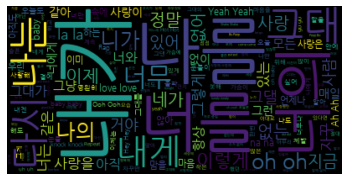

In [18]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')